2. **Interpolation and thermodynamics**

Interpolation can be tricky in thermodynamics, where there are particular requirements on derivatives that need to be satisfied. We'll investigate that in this question by looking at an ideal gas in a range of temperatures and densities appropriate for Earth's atmosphere. The pressure and entropy per particle of an ideal gas are given by 

$$P = nk_BT, \hspace{1cm} S = k_B \left({5\over 2}-\ln \left({n\over n_Q} \right) \right)$$

where $T$ is the temperature, $n$ is the number density of molecules and $n_Q=(m k_BT/2\pi\hbar^2)^{3/2}$ with $m$ the particle mass. For Earth atmosphere modelling, we can take density and temperature ranges of $10^{-6}$--$1\ {\rm kg\ m^{-3}}$ and $100$--$1000\ {\rm K}$. For this question, you can assume that the atmosphere has a mean molecular weight of $28$, ie. $m=28m_u$ where $m_u$ is the atomic mass unit, and $\rho = 28 m_u n$. 

Whereas in the example in class we used [`scipy.interpolate.RegularGridInterpolator`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html) for 2D interpolation, in this question you may wish to use [`scipy.interpolate.RectBivariateSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RectBivariateSpline.html#scipy.interpolate.RectBivariateSpline) instead because you can use it to generate derivatives for you (see the `partial_derivative()` method).

(a) Use the formulae given above to calculate the pressure ($\log_{10} P$) and entropy ($S/k_B$) for a uniformly-spaced grid of values of $\log_{10}T$ and $\log_{10}\rho$ that span the range of interest for Earth's atmosphere. Since we are interested in interpolation here, use a small number of points in each direction (e.g. $10$ points).
Interpolate within your table and plot a color map of the fractional error across the $\log_{10}T$--$\log_{10}\rho$ plane. [Since pressure spans orders of magnitude, it's useful to deal with $\log_{10} P$ and similarly $S/k_B$ is a useful way to look at the entropy.]

(b) Now check to what extent your interpolation is *thermodynamically consistent*: In terms of the Helmholtz free energy per particle $F=E-TS$, where $E=(3/2)k_BT$ is the internal energy per particle, the pressure and entropy are given by 

$$S = -\left.{\partial F\over \partial T}\right|_n; \hspace{1cm} P = n^2 \left.{\partial F\over \partial n}\right|_T.$$ 

This implies that the entropy and pressure must satisfy the Maxwell relation

$$-\left.{\partial S\over \partial n}\right|_T = {1\over n^2}\left.{\partial P\over \partial T}\right|_n.$$

Numerically evaluate these derivatives to see how well the Maxwell relation is satisfied in your interpolation scheme. (Plot the fractional difference between the left and right hand sides).
Explain what you are finding -- is it a surprise given the equation of state and interpolation scheme you are using? Would you expect this result to hold for more complicated equations of state?

(c) *Optional*: One way to interpolate that is automatically thermodynamically consistent is to make a grid of values of 

$$F = k_BT \left(\ln \left({n\over n_Q}\right) -1 \right),$$ 

interpolate $F$ as a function of density and temperature, and then calculate $P$ and $S$ as derivatives of $F$ using derivatives of the interpolating functions. Try implementing this and evaluate the errors in $P$ and $S$ and check that your values are thermodynamically consistent. Compare your results with what you found in (a) and (b) where you interpolated $P$ and $S$ directly.

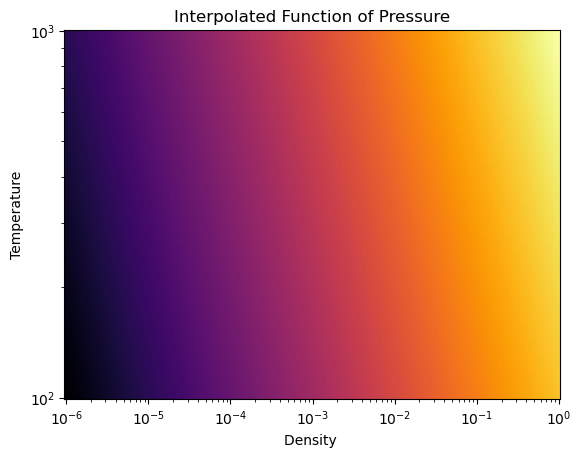

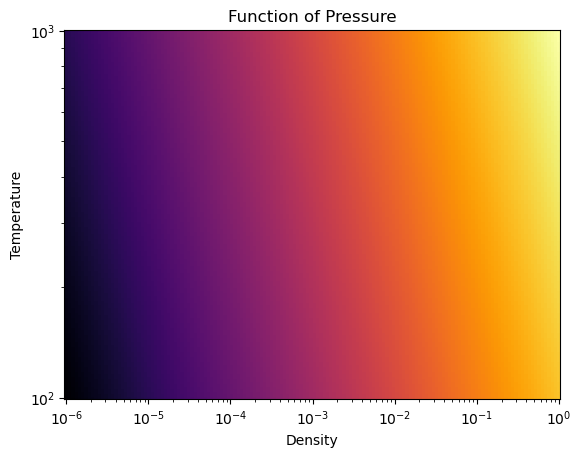

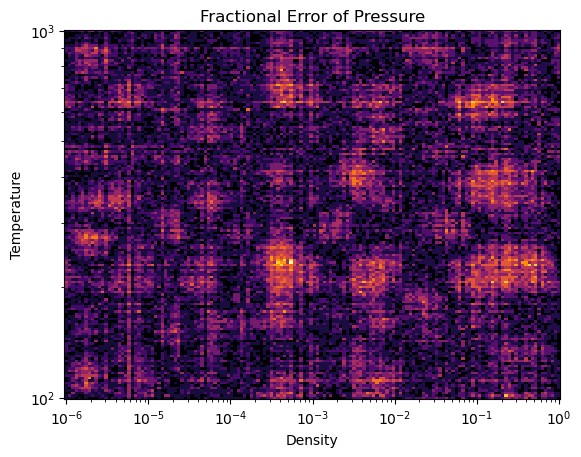

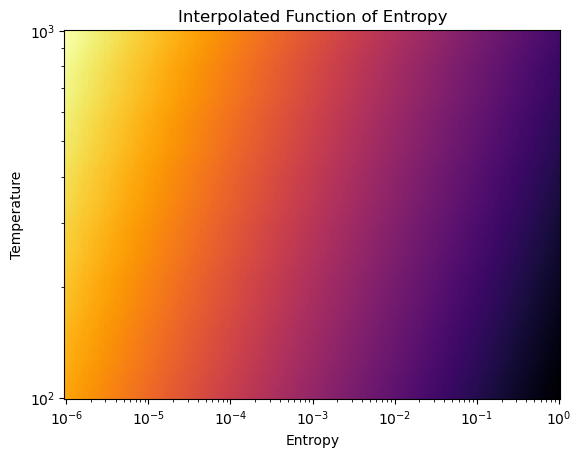

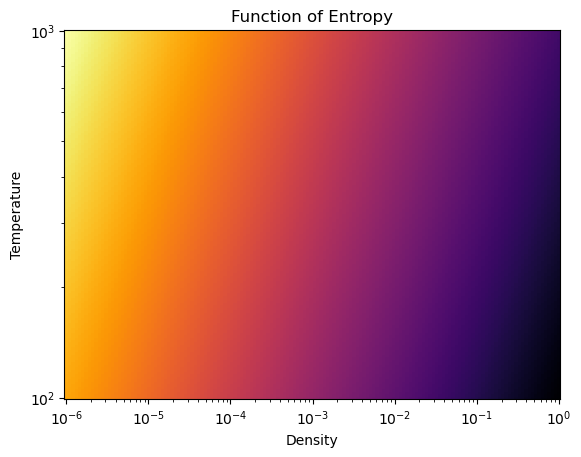

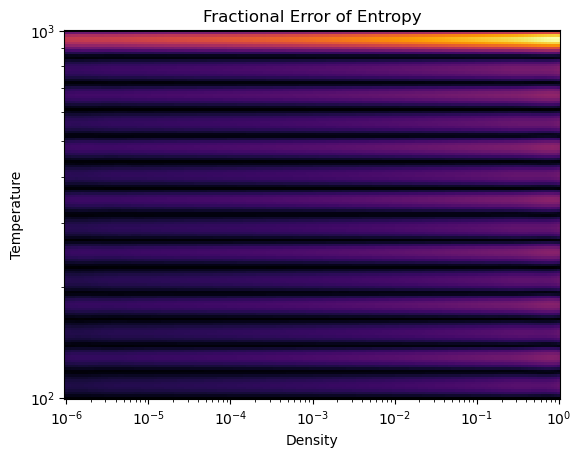

In [45]:
import numpy as np, matplotlib.pyplot as plt, scipy.interpolate

#Functions 
def log_P(logp,logT):
    logP = log_k+logT+logp
    return logP

def S(p,T):
    S = ((5/2)-np.log(p*((2*np.pi*(h**2)))**(3/2)/(m*(m*k_B*T)**(3/2))))
    return S

# Definition of parameters and constants
n = 15
h = 6.62607015*10**(-34)
k_B = 1.380649*10**(-23)
m_u = 1.66053886*10**(-27)
m = 28*m_u
log_k = np.log10(k_B)
log_m = np.log10(m)

T_1 = 10**np.linspace(2, 3, n)
p_1  = 10**np.linspace(-6, 0, n)
T_2 = 10**np.linspace(2, 3, 10*n)
p_2  = 10**np.linspace(-6, 0, 10*n)

logT_1 = np.log10(T_1)
logp_1 = np.log10(p_1)
logT_2 = np.log10(T_2)
logp_2 = np.log10(p_2)

P_1 = np.zeros((len(T_1),len(p_1)))
S_1 = np.zeros((len(T_1),len(p_1)))

P_2 = np.zeros((len(T_2),len(p_2)))
S_2 = np.zeros((len(T_2),len(p_2)))

# Calculation of Pressure and Entropy
for i, logT in enumerate(logT_1):
    for j, logp in enumerate(logp_1):
        P_1[i][j] = log_P(logp,logT)
        S_1[i][j] = S(10**logp,10**logT)

for i, logT in enumerate(logT_2):
    for j, logp in enumerate(logp_2):
        P_2[i][j] = log_P(logp,logT)
        S_2[i][j] = S(10**logp,10**logT)

# Interpolation of our functions
interp_P = scipy.interpolate.RectBivariateSpline(logp_1, logT_1, P_1)
interp_S = scipy.interpolate.RectBivariateSpline(p_1, T_1, S_1)

# Meshgrid of densities and temperatures
[p, T] = np.meshgrid(10**logp_2, 10**logT_2)

# Plots
plt.figure()
plt.pcolormesh(p, T, interp_P(logp_2,logT_2), cmap='inferno')
plt.xlabel('Density ')
plt.ylabel('Temperature')
plt.title('Interpolated Function of Pressure')
plt.loglog()
plt.show()

plt.figure()
plt.pcolormesh(p, T, P_2, cmap='inferno')
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.title('Function of Pressure')
plt.loglog()
plt.show()

plt.figure()
plt.pcolormesh(p, T, np.abs((interp_P(logp_2,logT_2)-P_2)/P_2) , cmap='inferno')
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.title('Fractional Error of Pressure')
plt.loglog()
plt.show()
                                                                 
plt.figure()
plt.pcolormesh(p, T, interp_S(p_2, T_2 ), cmap='inferno')
plt.xlabel('Entropy')
plt.ylabel('Temperature')
plt.title('Interpolated Function of Entropy')
plt.loglog()
plt.show()

plt.figure()
plt.pcolormesh(p, T, S_2, cmap='inferno')
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.title('Function of Entropy')
plt.loglog()
plt.show()

plt.figure()
plt.pcolormesh(p, T, np.abs((interp_S(p_2,T_2)-S_2)/S_2) , cmap='inferno')
plt.xlabel('Density')
plt.ylabel('Temperature')
plt.title('Fractional Error of Entropy')
plt.loglog()
plt.show()